# 2.1. Problem Statement: Numpy 

### Problem Statement 1:

Write a function so that the columns of the output matrix are powers of the input vector. 
 
The order of the powers is determined by the increasing boolean argument. Specifically, when increasing is False, the i-th output column is the input vector raised element-wise to the power of N - i - 1. 
 
HINT: Such a matrix with a geometric progression in each row is named for AlexandreTheophile Vandermonde. 

In [1]:
import numpy as np

In [2]:
def Alexandre_Vandermonde(input,N):
    values = np.column_stack([input**(N-1-i) for i in range(N)])
    return values

In [3]:
#test the function

Alexandre_Vandermonde(np.array([1,2,3,4,5,6,7]),3)

array([[ 1,  1,  1],
       [ 4,  2,  1],
       [ 9,  3,  1],
       [16,  4,  1],
       [25,  5,  1],
       [36,  6,  1],
       [49,  7,  1]], dtype=int32)

### Problem Statement 2: 

Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average of the given sequence is defined as follows: 
 
The moving average sequence has n-k+1 elements as shown below. 
 
The moving averages with k=4 of a ten-value sequence (n=10) is shown below 
 
i 1 2 3 4 5 6 7 8 9 10  
===== == == == == == == == == == ==  
Input 10 20 30 40 50 60 70 80 90 100  
y1 25 = (10+20+30+40)/4  
y2 35 = (20+30+40+50)/4  
y3 45 = (30+40+50+60)/4  
y4 55 = (40+50+60+70)/4  
y5 65 = (50+60+70+80)/4  
y6 75 = (60+70+80+90)/4  
y7 85 = (70+80+90+100)/4 
 
 
Thus, the moving average sequence has n-k+1=10-4+1=7 values. 
 
##### Question: 
Write a function to find moving average in an array over a window: Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3. 

In [4]:
import numpy as np
from numpy import convolve
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [5]:
#test the function

movingaverage([3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150],3)

array([  5.        ,   4.66666667,   5.66666667,   6.66666667,
         9.66666667,  28.66666667,  49.33333333,  72.66666667,
        84.        ,  93.33333333, 116.33333333])

# 2.2. Problem Statement: Pandas

### Problem Statement 1:

##### 1) How-to-count-distance-to-the-previous-zero 
 
For each value, count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) and if there are no previous zeros, print the position 
 
Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]} 
 
##### The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'. 

     import pandas as pd 
     df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}) 

In [6]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

izero = np.r_[-1, (df['X'] == 0).to_numpy().nonzero()[0]]
idx = np.arange(len(df))
df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]

In [7]:
#output

print(df)

   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


##### 2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. 

In [8]:
dti = pd.date_range(start='1/1/2015', end='31/12/2015',freq='B')
s = pd.Series(np.random.rand(len(dti)), index=dti)

s

2015-01-01    0.739607
2015-01-02    0.039492
2015-01-05    0.756876
2015-01-06    0.878296
2015-01-07    0.847847
2015-01-08    0.442856
2015-01-09    0.647073
2015-01-12    0.314278
2015-01-13    0.555414
2015-01-14    0.923403
2015-01-15    0.656820
2015-01-16    0.272026
2015-01-19    0.235346
2015-01-20    0.134715
2015-01-21    0.167592
2015-01-22    0.850304
2015-01-23    0.689926
2015-01-26    0.417492
2015-01-27    0.855128
2015-01-28    0.023599
2015-01-29    0.617317
2015-01-30    0.603090
2015-02-02    0.916985
2015-02-03    0.139161
2015-02-04    0.037707
2015-02-05    0.713187
2015-02-06    0.626971
2015-02-09    0.654486
2015-02-10    0.721305
2015-02-11    0.816981
                ...   
2015-11-20    0.823394
2015-11-23    0.027177
2015-11-24    0.738553
2015-11-25    0.479559
2015-11-26    0.251291
2015-11-27    0.229459
2015-11-30    0.460858
2015-12-01    0.979678
2015-12-02    0.171775
2015-12-03    0.127773
2015-12-04    0.635441
2015-12-07    0.330326
2015-12-08 

##### 3) Find the sum of the values in s for every Wednesday

In [9]:
s[dti.weekday == 2].sum()

26.639504025647756

##### 4) Average For each calendar month

In [10]:
s.resample('M').mean()

2015-01-31    0.530386
2015-02-28    0.503254
2015-03-31    0.595137
2015-04-30    0.477617
2015-05-31    0.461291
2015-06-30    0.377238
2015-07-31    0.459233
2015-08-31    0.518020
2015-09-30    0.511905
2015-10-31    0.541960
2015-11-30    0.476839
2015-12-31    0.522833
Freq: M, dtype: float64

##### 5) For each group of four consecutive calendar months in s, find the date on which the highest value occurred.

In [11]:
s.groupby(pd.Grouper(freq='4M')).idxmax()

2015-01-31   2015-01-14
2015-05-31   2015-03-04
2015-09-30   2015-07-06
2016-01-31   2015-11-10
Freq: 4M, dtype: datetime64[ns]

### Problem Statement 2: 

##### Read the dataset from the below link 
 
 
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv 

##### Questions: 

In [12]:
import numpy as np
import pandas as pd

baby_names = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")

baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


##### 1) Delete unnamed columns

In [13]:
del baby_names['Unnamed: 0']

baby_names.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


##### 2) Show the distribution of male and female 

In [14]:
baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

##### 3) Show the top 5 most preferred names 

In [15]:
names = baby_names.groupby(['Name']).sum()

names.sort_values(by='Count',axis=0,ascending=False).head(5)['Count']

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64

##### 4) What is the median name occurrence in the dataset 

In [16]:
# We have already grouped by 'Names' and named the new datafreame as name

names[names['Count'] == names['Count'].median()]['Count']

Name
Aishani       49
Alara         49
Alysse        49
Ameir         49
Anely         49
Antonina      49
Aveline       49
Aziah         49
Baily         49
Caleah        49
Carlota       49
Cristine      49
Dahlila       49
Darvin        49
Deante        49
Deserae       49
Devean        49
Elizah        49
Emmaly        49
Emmanuela     49
Envy          49
Esli          49
Fay           49
Gurshaan      49
Hareem        49
Iven          49
Jaice         49
Jaiyana       49
Jamiracle     49
Jelissa       49
              ..
Kyndle        49
Kynsley       49
Leylanie      49
Maisha        49
Malillany     49
Mariann       49
Marquell      49
Maurilio      49
Mckynzie      49
Mehdi         49
Nabeel        49
Nalleli       49
Nassir        49
Nazier        49
Nishant       49
Rebecka       49
Reghan        49
Ridwan        49
Riot          49
Rubin         49
Ryatt         49
Sameera       49
Sanjuanita    49
Shalyn        49
Skylie        49
Sriram        49
Trinton       49
Vita     

##### 5) Distribution of male and female born count by states

In [17]:
baby_names.groupby(['State','Gender']).sum()['Count']

State  Gender
AK     F           26250
       M           37399
AL     F          215308
       M          260114
AR     F          129712
       M          162947
AZ     F          368567
       M          439691
CA     F         2414063
       M         2670584
CO     F          260805
       M          313425
CT     F          141350
       M          171397
DC     F           35276
       M           47228
DE     F           31312
       M           41748
FL     F          915422
       M         1060957
GA     F          549637
       M          635531
HI     F           37279
       M           53127
IA     F          144764
       M          174009
ID     F           72808
       M           94320
IL     F          695312
       M          791679
                  ...   
OK     F          184967
       M          228613
OR     F          172111
       M          209445
PA     F          593382
       M          682709
RI     F           35560
       M           47939
SC     F   

# 2.3. Problem Statement: Use Cases on Numpy and Pandas 

##### 1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception handling using try-catch which gives the output as: 
 
##### Output: 
 
##### 1) If the List element is a alphabet or string, the output will be 
 
The entry is a Oops! <class 'ValueError'> occured. 
Next entry. 
 
##### 2) If the List element is “0”,the output will be 
 
The entry is 0 Oops! <class 'ZeroDivisionError'> occured.  
Next entry. 
 
##### 3) If the List element is and integer except 0,then output will be: 
 
The entry is 2 The reciprocal of 2 is 0.5 // reciprocal of an integer

In [18]:
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!",sys.exc_info()[0],"occured.")
        print("Next entry.")
        print()
print("The reciprocal of",entry,"is",r,"// reciprocal of an integer")

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5 // reciprocal of an integer


##### 2) Array out of Bound Exception

Write a Python program to give exception “Array Out of Bound” if the user wants to access the elements beyond the list size (use try and except) 

In [19]:
import numpy as np


try:
    mylist = [1,2,3,4,5]
    arr = np.array(mylist)
    print(arr[5])
except IndexError as e:
    print( "Array Out of Bound:", e)

Array Out of Bound: index 5 is out of bounds for axis 0 with size 5


##### 3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py. 
 
Note : The module created as fibo.py has to be placed in lib folder 
 
For linux/ubuntu path = /home/anaconda/lib/python3 
For Windows path = C:\Users\Ajit\Anaconda3\Lib 

In [20]:
# Python module saved as fibo.py which contains following fib2() method

def fib2(n): 
    result = []
    a, b = 0, 1
    while b < n:
        if a == 0:
            result.append(a) 
        result.append(b)
        a,b = b, a+b
    return result

#verify the method

fib2(1000)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

In [21]:
# import the method from module and verify 

from fibo import fib2
fib2(1000)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

##### 4) Write a python module script that contains ispalindrome() method to calculate the input string as palindrome string or not and save it as palindrome.py.

In [22]:
# Python module saved as palindrome.py which contains following ispalindrome() method

def isPalindrome(s): 
    rev = s[::-1] 
    if (s == rev): 
        return True
    return False

#Verify the method

print(isPalindrome('DOG'))
print(isPalindrome('madam'))

False
True


In [23]:
# import the method from module and verify

from palindrome import isPalindrome

print(isPalindrome('Elephant'))
print(isPalindrome('redivider'))

False
True


##### 5) Write a program in Python with one class called Cipher. Within the constructor of this class, ask user for a string and store it. Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive. Implement two methods, encrypt and decrypt within this class. Encrypt generates and prints a cipher text using the user-entered string and the key and ecrypt generates decrypted string from ciphertext. The cipher only encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted. The cipher text can have special characters. Use generator expression to filter out alpha and numeric characters of the input string and to generate cipher text. Create an instance of this class, encrypt and decrypt back the user entered string.

In [24]:
class Cipher:

    def __init__(self):
        text = input("Enter the String:" )
        self.plainText = text
        import random
        key = random.randint(0,51)
        self.key = key
        
    def encrypt(self):
        upper = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
        lower = "abcdefghijklmnopqrstuwxyz"
        number = "0123456789"
        self.cipherText = ""
        for ch in self.plainText:
            value = ord(ch)
            if 48<= value <= 57:
                new_value = number[(number.index(ch)+self.key)%10]
            elif 65<= value <= 90:
                new_value = upper[(upper.index(ch)+self.key)%26]
            elif 97<= value <= 122:
                new_value = lower[(lower.index(ch)+self.key)%26]
            else:
                new_value = ch
            finalLetter = str(new_value)
            self.cipherText += finalLetter

        print ("Your cipher text is: ", self.cipherText)
        
    def decrypt(self):
        upper = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
        lower = "abcdefghijklmnopqrstuwxyz"
        number = "0123456789"
        DecryptedValue = ""
        for ch in self.cipherText:
            value = ord(ch)
            if 48<= value <= 57:
                new_value = number[(number.index(ch)-self.key)%10]
            elif 65<= value <= 90:
                new_value = upper[(upper.index(ch)-self.key)%26]
            elif 97<= value <= 122:
                new_value = lower[(lower.index(ch)-self.key)%26]
            else:
                new_value = ch
            finalLetter = str(new_value)
            DecryptedValue += finalLetter

        print ("Your decrypted text is: ", DecryptedValue)

In [25]:
# Create an instance of this Cipher class and accept the user input

Cipher_Instance = Cipher()

Enter the String:Summer29@$$Winter29


In [26]:
# Encrypt the user entered text

Cipher_Instance.encrypt()

Your cipher text is:  Oqiian41@$$Sejpan41


In [27]:
# Decrypt back the encypted text

Cipher_Instance.decrypt()

Your decrypted text is:  Summer29@$$Winter29


##### 6) Get Data from the following link: 
 
http://files.grouplens.org/datasets/movielens/ml-20m.zip 
 
We will be using the following files for this exercise: 
 
###### ratings.csv : userId,movieId,rating, timestamp 
###### tags.csv : userId,movieId, tag, timestamp 
###### movies.csv : movieId, title, genres

###### I. Read the dataset using pandas.

In [28]:
import numpy as np
import pandas as pd

ratings_df = pd.read_csv("ratings.csv")
tags_df = pd.read_csv("tags.csv")
movies_df = pd.read_csv("movies.csv")

In [29]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [30]:
tags_df.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [31]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


###### II. Extract the first row from tags and print its type.

In [32]:
# Extract the first row
tags_df.iloc[[0]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180


In [33]:
# Print type
type(tags_df.iloc[[0]])

pandas.core.frame.DataFrame

###### III.  Extract row 0, 11, 2000 from tags DataFrame. 

In [34]:
tags_df.iloc[[0,11,2000]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


###### IV.  Print index, columns of the DataFrame. 

In [35]:
# index and columns of ratings dataset

print("Index of ratings dataset:", ratings_df.index.values)
print("Columns of ratings dataset:", ratings_df.columns.values)

Index of ratings dataset: [       0        1        2 ... 20000260 20000261 20000262]
Columns of ratings dataset: ['userId' 'movieId' 'rating' 'timestamp']


In [36]:
# index and columns of tags dataset

print("Columns of tags dataset:", tags_df.index.values)
print("Columns of tags dataset:", tags_df.columns.values)

Columns of tags dataset: [     0      1      2 ... 465561 465562 465563]
Columns of tags dataset: ['userId' 'movieId' 'tag' 'timestamp']


In [37]:
# index and columns of movies dataset

print("Columns of movies dataset:", movies_df.index.values)
print("Columns of movies dataset:", movies_df.columns.values)

Columns of movies dataset: [    0     1     2 ... 27275 27276 27277]
Columns of movies dataset: ['movieId' 'title' 'genres']


###### V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe(). 

In [38]:
# Descriptive statistics

print("Count:", ratings_df['rating'].count())
print("Mean :", ratings_df['rating'].mean())
print("std  :", ratings_df['rating'].std())
print("Min  :", ratings_df['rating'].min())
print("Max  :", ratings_df['rating'].max())
print("25%  :", ratings_df['rating'].quantile(0.25))
print("50%  :", ratings_df['rating'].quantile(0.50))
print("75%  :", ratings_df['rating'].quantile(0.75))

Count: 20000263
Mean : 3.5255285642993797
std  : 1.051988919275684
Min  : 0.5
Max  : 5.0
25%  : 3.0
50%  : 3.5
75%  : 4.0


In [39]:
#Verify using Describe

ratings_df['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

###### VI. Filter out ratings with rating > 5 

In [40]:
ratings_df[(ratings_df['rating']>5) != True].head(20)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


###### VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified. 

In [41]:
# Number of Null values,missing values in ratings dataset for each column

ratings_df.isnull().sum(axis=0)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [42]:
# Number of Null values,missing values in movies dataset for each column
movies_df.isnull().sum(axis=0)

movieId    0
title      0
genres     0
dtype: int64

In [43]:
# Number of Null values,missing values in tags dataset for each column
tags_df.isnull().sum(axis=0)

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [44]:
# fill the null values in tags dataset
tags_df['tag'].fillna("tag not available",inplace= True)

# Verify the null values in tags dataset
tags_df.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [45]:
#Print out how many rows have been modified
print(tags_df[tags_df['tag']=="tag not available"]["tag"].count())

16


###### VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.

In [46]:
movies_df[movies_df['genres'].str.contains("Animation") == False]

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
10,11,"American President, The (1995)",Comedy|Drama|Romance


###### IX. Find the average rating of movies. 

In [47]:
ratings_df['rating'].mean()

3.5255285642993797

###### X. Perform an inner join of movies and tags based on movieId. 

In [48]:
movies_df.join(tags_df,on='movieId',how='inner',lsuffix='_mov',rsuffix='_tag')

,movieId,movieId_mov,title,genres,userId,movieId_tag,tag,timestamp
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,65,208,dark hero,1368150078
1,2,2,Jumanji (1995),Adventure|Children|Fantasy,65,353,dark hero,1368150079
2,3,3,Grumpier Old Men (1995),Comedy|Romance,65,521,noir thriller,1368149983
3,4,4,Waiting to Exhale (1995),Comedy|Drama|Romance,65,592,dark hero,1368150078
4,5,5,Father of the Bride Part II (1995),Comedy,65,668,bollywood,1368149876
5,6,6,Heat (1995),Action|Crime|Thriller,65,898,screwball comedy,1368150160
6,7,7,Sabrina (1995),Comedy|Romance,65,1248,noir thriller,1368149983
7,8,8,Tom and Huck (1995),Adventure|Children,65,1391,mars,1368150055
8,9,9,Sudden Death (1995),Action,65,1617,neo-noir,1368150217
9,10,10,GoldenEye (1995),Action|Adventure|Thriller,65,1694,jesus,1368149925


###### XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4. 

In [49]:
# join the movies and ratings dataset

movie_ratings_df = movies_df.join(ratings_df,on='movieId',how='left',lsuffix='_mov',rsuffix='_rate')


# Filter the movies with Comedy genre which have rating greater than 4

data = movie_ratings_df[(movie_ratings_df['genres'].str.contains('Comedy')) & (movie_ratings_df['rating']>4)][['title','genres','rating']]

data.set_index('title',inplace = True)


# Print out 5 movies with Comedy genre which have rating greater than 4

print(data.head(5))

                                           genres  rating
title                                                    
Jeffrey (1995)                       Comedy|Drama     4.5
Living in Oblivion (1995)                  Comedy     5.0
Mallrats (1995)                    Comedy|Romance     5.0
Mute Witness (1994)        Comedy|Horror|Thriller     5.0
Smoke (1995)                         Comedy|Drama     5.0


###### XII. Split 'genres' into multiple columns.

In [50]:
movie_genres = movies_df['genres'].str.split('|',expand = True)

movie_genres = movie_genres.rename(columns = lambda x : 'genre_' + str(x))

movie_genres

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


###### XIII. Extract year from title e.g. (1995). 

In [51]:
movie_year = movies_df['title'].str.extract("\((\d{4})\)")

movie_year.rename(index=str,columns = {0:'Year'})

,Year
0,1995
1,1995
2,1995
3,1995
4,1995
5,1995
6,1995
7,1995
8,1995
9,1995


###### XIV. Select rows based on timestamps later than 2015-02-01. 

In [52]:
# ratings dataset

ratings_df[ratings_df["timestamp"] > 2015-2-1].head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [53]:
# tags dataset

tags_df[tags_df["timestamp"] > 2015-2-1].head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


###### XV. Sort the tags DataFrame based on timestamp. 

In [54]:
tags_df.sort_values(by=['timestamp'],ascending=True).head()

,userId,movieId,tag,timestamp
333932,100371,2788,monty python,1135429210
333927,100371,1732,coen brothers,1135429236
333924,100371,1206,stanley kubrick,1135429248
333923,100371,1193,jack nicholson,1135429371
333939,100371,5004,peter sellers,1135429399


# 2.4. Problem Statement: Matplotlib 

##### Matplotlib: 
 
This assignment is for visualization using matplotlib: 
 
data to use: 
 
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 
 
titanic = pd.read_csv(url) 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


###### Charts to plot:

1. Create a pie chart presenting the male/female proportion. 

In [57]:
data = titanic['sex'].value_counts().tolist()
data

[843, 466]

In [58]:
Sex = titanic['sex'].dropna().unique().tolist()
Sex

['female', 'male']

([<matplotlib.patches.Wedge at 0x1e1036bf080>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'female'),
  Text(0.48083667958064136, -0.9893412391939719, 'male')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.40'),
  Text(0.26227455249853165, -0.5396406759239846, '35.60')])

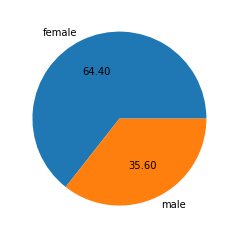

In [59]:
plt.pie(data,labels=Sex,autopct='%1.2f')

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender.

In [60]:
colors = {'male':'orange', 'female':'blue'}
colors

{'male': 'orange', 'female': 'blue'}

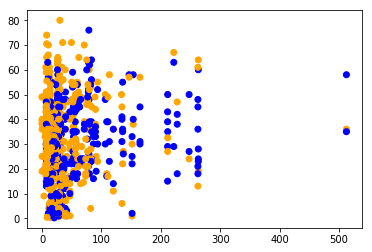

In [61]:
plt.scatter(titanic[titanic['sex'].notna()]['fare'],titanic[titanic['sex'].notna()]['age'],c=titanic['sex'].iloc[:-1].apply(lambda x: colors[x]))

# 2.5. Problem Statement: Data Cleaning

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis? 
 
Take this monstrosity as the DataFrame to use in the following puzzles: 
 
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'], 
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']}) 

In [62]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'], 
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']}) 

df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


##### 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [63]:
# fill the missing values
df['FlightNumber'].fillna(value = df['FlightNumber'].fillna(method = 'ffill') + 10.0,inplace = True)

# change the datatype to int
df['FlightNumber'] = df['FlightNumber'].astype(int)

In [64]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


##### 2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

In [65]:
#Create a temporary dataframe
temp_df = df['From_To'].str.split('_',expand = True)

#Rename the columns
temp_df.rename(columns = {0: "From", 1: "To"},inplace = True)

In [66]:
temp_df

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


##### 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".) 

In [67]:
temp_df["From"] = temp_df["From"].str.capitalize()
temp_df["To"] = temp_df["To"].str.capitalize()

In [68]:
temp_df

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


##### 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions. 

In [69]:
# delete 'From_To' from df
del df['From_To']

# attach the temporary DataFrame to df
df = pd.concat([df,temp_df],axis=1)

In [70]:
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


##### 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN. 

In [71]:
# Crate separate columns from each value
delays = df['RecentDelays'].apply(pd.Series)

In [72]:
delays

,0,1,2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


##### 6. Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays. 

In [73]:
#rename the columns
delays = delays.rename(columns = lambda x : 'delay_' + str(x))


# inserting the delay columns 
df  = df.drop('RecentDelays', axis = 1)
df.insert(1, "delay_0", delays['delay_0'])
df.insert(2, "delay_1", delays['delay_1'])
df.insert(3, "delay_2", delays['delay_2'])

In [74]:
df

,FlightNumber,delay_0,delay_1,delay_2,Airline,From,To
0,10045,23.0,47.0,NaN,KLM(!),London,Paris
1,10055,NaN,NaN,NaN,<Air France> (12),Madrid,Milan
2,10065,24.0,43.0,87.0,(British Airways. ),London,Stockholm
3,10075,13.0,NaN,NaN,12. Air France,Budapest,Paris
4,10085,67.0,32.0,NaN,"""Swiss Air""",Brussels,London


# 2.6. Problem Statement: Pandas SQL 

### Problem statement 1: 

Read the following data set: 
 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/ 
 
Rename the columns as per the description from this file: 
 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names 

In [75]:
import numpy as np
import pandas as pd

In [76]:
#read and rename the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 names = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","salary"]) 

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [77]:
# There are some white spaces found in dataframe. Remove the white spaces.

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Task: 

Create a sql db from adult dataset and name it sqladb

In [78]:
import sqlite3

#Create sqladb DB
con = sqlite3.connect('sqladb.db')

###### 1. Select 10 records from the adult sqladb

In [79]:
pd.read_sql("select * from adult",con)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


###### 2. Show me the average hours per week of all men who are working in private sector

In [80]:
pd.read_sql("SELECT avg(hours_per_week) from adult where sex = 'Male' and  workclass = 'Private' group by sex,workclass",con)

,avg(hours_per_week)
0,42.221226


###### 3. Show me the frequency table for education, occupation and relationship, separately 

In [81]:
# frequency table for education

education_frequency = pd.read_sql("SELECT education,count(education) from adult group by education",con)
education_frequency

,education,count(education)
0,10th,933
1,11th,1175
2,12th,433
3,1st-4th,168
4,5th-6th,333
5,7th-8th,646
6,9th,514
7,Assoc-acdm,1067
8,Assoc-voc,1382
9,Bachelors,5355


In [82]:
# frequency table for occupation

occupation_frequency = pd.read_sql("SELECT occupation,count(occupation) from adult group by occupation",con)
occupation_frequency

,occupation,count(occupation)
0,?,1843
1,Adm-clerical,3770
2,Armed-Forces,9
3,Craft-repair,4099
4,Exec-managerial,4066
5,Farming-fishing,994
6,Handlers-cleaners,1370
7,Machine-op-inspct,2002
8,Other-service,3295
9,Priv-house-serv,149


In [83]:
# frequency table for relationship

relationship_frequency = pd.read_sql("SELECT relationship,count(relationship) from adult group by relationship",con)
relationship_frequency

,relationship,count(relationship)
0,Husband,13193
1,Not-in-family,8305
2,Other-relative,981
3,Own-child,5068
4,Unmarried,3446
5,Wife,1568


###### 4. Are there any people who are married, working in private sector and having a master’s degree

In [84]:
pd.read_sql("SELECT * from adult where marital_status in ('Married-civ-spouse','Married-spouse-absent','Married-AF-spouse') and workclass = 'Private' and education = 'Masters'",con)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
1,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
2,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
3,31,Private,99928,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,<=50K
4,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States,>50K
5,34,Private,142897,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,7298,0,35,Taiwan,>50K
6,62,Private,270092,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
7,41,Private,445382,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,65,United-States,>50K
8,33,Private,208405,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
9,49,Private,192776,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,45,United-States,>50K


###### Yes, There are people with given conditions.

###### 5. What is the average, minimum and maximum age group for people working in different sectors

In [85]:
pd.read_sql("SELECT workclass,avg(age),min(age),max(age) from adult group by workclass",con)

,workclass,avg(age),min(age),max(age)
0,?,40.960240,17,90
1,Federal-gov,42.590625,17,90
2,Local-gov,41.751075,17,90
3,Never-worked,20.571429,17,30
4,Private,36.797585,17,90
5,Self-emp-inc,46.017025,17,84
6,Self-emp-not-inc,44.969697,17,90
7,State-gov,39.436055,17,81
8,Without-pay,47.785714,19,72


###### 6. Calculate age distribution by country 

In [86]:
pd.read_sql("SELECT native_country,age,count(age) from adult group by native_country,age",con)

,native_country,age,count(age)
0,?,17,2
1,?,18,8
2,?,19,5
3,?,20,10
4,?,21,11
5,?,22,12
6,?,23,6
7,?,24,14
8,?,25,11
9,?,26,18


###### 7. Compute a new column as 'Net_Capital_Gain' from the two columns 'capitalgain' and 'capitalloss'

In [87]:
# Net_Capital_Gain = capital_gain - capital_loss

pd.read_sql("SELECT *,(capital_gain - capital_loss) as 'Net_Capital_Gain' from adult",con)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,Net_Capital_Gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,14084
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,5178


### Problem statement 2: 

Read the following data set: 
 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data 

In [88]:
import numpy as np
import pandas as pd

In [89]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 names = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","salary"])

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Task:

###### 1. Create an sqlalchemy engine using a sample from the data set 

In [91]:
from sqlalchemy import create_engine

#Create sqlalchemy engine
engine = create_engine('sqlite:///:memory:')
conn = engine.connect()

In [92]:
#Create table from dataset

df.to_sql('my_table',engine,index=False)

#Read the data from table

pd.read_sql("select * from my_table",engine)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


###### 2. Write two basic update queries 

In [93]:
conn.execute("UPDATE my_table SET hours_per_week = 40 where occupation = 'Exec-managerial'")

#Verify the data
pd.read_sql("select occupation,hours_per_week from my_table where occupation = 'Exec-managerial' LIMIT 10",conn)

,occupation,hours_per_week
0,Exec-managerial,40
1,Exec-managerial,40
2,Exec-managerial,40
3,Exec-managerial,40
4,Exec-managerial,40
5,Exec-managerial,40
6,Exec-managerial,40
7,Exec-managerial,40
8,Exec-managerial,40
9,Exec-managerial,40


In [94]:
conn.execute("UPDATE my_table SET salary = '=60K' where workclass = 'Private'")

#Verify the data
pd.read_sql("select workclass,salary from my_table where workclass = 'Private' LIMIT 10",conn)

,workclass,salary
0,Private,=60K
1,Private,=60K
2,Private,=60K
3,Private,=60K
4,Private,=60K
5,Private,=60K
6,Private,=60K
7,Private,=60K
8,Private,=60K
9,Private,=60K


###### 3. Write two delete queries 

In [95]:
conn.execute("delete from my_table where marital_status = 'Divorced'")

#verify the data
pd.read_sql("select * from my_table where marital_status = 'Divorced'",conn)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary


In [96]:
conn.execute("delete from my_table where workclass = 'State-gov'")

#verify the data
pd.read_sql("select * from my_table where workclass = 'State-gov'",conn)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary


###### 4. Write two filter queries 

In [97]:
pd.read_sql("select * from my_table where education = 'Bachelors' and age between 20 and 30 LIMIT 10;",conn)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,=60K
1,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,=60K
2,24,Private,172987,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,=60K
3,30,Private,59496,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,2407,0,40,United-States,=60K
4,29,Self-emp-not-inc,162298,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,70,United-States,>50K
5,24,Private,432376,Bachelors,13,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,=60K
6,30,Private,77143,Bachelors,13,Never-married,Exec-managerial,Own-child,Black,Male,0,0,40,Germany,=60K
7,23,Private,214542,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,=60K
8,27,Private,428030,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,=60K
9,22,Private,34918,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,15,Germany,=60K


In [98]:
pd.read_sql("select * from my_table where sex = 'Female' and salary = '>50K' LIMIT 10",conn)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,43,Federal-gov,410867,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
1,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,14084,0,40,United-States,>50K
2,58,Self-emp-inc,210563,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,15024,0,35,United-States,>50K
3,28,?,123147,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,1887,40,United-States,>50K
4,44,Self-emp-not-inc,234885,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,>50K
5,42,Local-gov,126319,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
6,46,Federal-gov,167381,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
7,59,Local-gov,420537,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,38,United-States,>50K
8,36,Self-emp-inc,108293,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1977,40,United-States,>50K
9,29,Self-emp-inc,260729,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,1977,25,United-States,>50K


###### 5. Write two function queries 

In [99]:
pd.read_sql("select marital_status,avg(age) from my_table group by marital_status",conn)

,marital_status,avg(age)
0,Married-AF-spouse,32.590909
1,Married-civ-spouse,43.244162
2,Married-spouse-absent,40.593516
3,Never-married,28.074197
4,Separated,39.249491
5,Widowed,58.983454


In [100]:
pd.read_sql("select workclass,sum(capital_gain) from my_table group by workclass",conn)

,workclass,sum(capital_gain)
0,?,1070530
1,Federal-gov,746800
2,Local-gov,1569748
3,Never-worked,0
4,Private,18380736
5,Self-emp-inc,5047041
6,Self-emp-not-inc,4241531
7,Without-pay,6830
